In [ ]:
from typing import List
# Структура для представления заявки (интервала)
class Interval:
    def __init__(self, id, start, end):
        self.id = id         # идентификатор заявки
        self.start = start       # время начала
        self.end = end         # время окончания
    def duration(self):
        return self.end - self.start # длительность заявки


# Жадный алгоритм выбора заявок по одной из стратегий
# по времени окончания (оптимальная стратегия)
# по времени начала (не оптимальная)
# по длительности (не оптимальная)
def selectIntervals(intervals: List[Interval], compareStrategy) -> List[Interval]:
    if not intervals: return []

    # Сортируем заявки по времени окончания
    intervals.sort(key=compareStrategy)

    selected = []
    lastEndTime = -1; # время окончания последней выбранной заявки

    for interval in intervals:
        # Если текущая заявка начинается после окончания последней выбранной
        if interval.start >= lastEndTime:
            selected.append(interval)
            lastEndTime = interval.end
    return selected

In [ ]:
# Функция для вывода расписания
def printSchedule(schedule: List[Interval], strategyName=None):
    if strategyName: print(f"\n{strategyName}:\nКоличество выбранных заявок: {len(schedule)}")
    print("Заявки:")
    print("ID\tНачало\tОкончание\tДлительность")
    print("----------------------------------------")

    for interval in schedule:
        print(f"{interval.id}\t{interval.start}\t{interval.end}\t{interval.duration()}")

In [ ]:
# Функция для создания тестового набора заявок
def createTestIntervals():
    return [
        Interval(1, 1, 3),   # ID, Start, End
        Interval(2, 2, 5),
        Interval(3, 4, 7),
        Interval(4, 6, 9),
        Interval(5, 8, 10),
        Interval(6, 9, 11),
        Interval(7, 11, 14),
        Interval(8, 13, 15)]


# Функция для создания контрпримера для стратегии "раннее начало"
def createCounterExample():
    return [
        Interval(1, 0, 10),  # Длинная ранняя заявка
        Interval(2, 1, 2),   # Короткие заявки, которые можно все выбрать
        Interval(3, 3, 4),
        Interval(4, 5, 6),
        Interval(5, 7, 8)
    ]

ОПТИМИЗАЦИЯ РАСПИСАНИЯ ЗАЯВОК

Тестовый пример 1: Общий случай

In [ ]:
intervals = createTestIntervals()

# Выводим все заявки
printSchedule(intervals)

#Сравниваем разные стратегии
optimalSchedule = selectIntervals(intervals, lambda x: x.end)
startTimeSchedule = selectIntervals(intervals, lambda x: x.start)
durationSchedule = selectIntervals(intervals, lambda x: x.duration())

printSchedule(optimalSchedule, "СТРАТЕГИЯ: Раннее окончание (ОПТИМАЛЬНАЯ)")
printSchedule(startTimeSchedule, "СТРАТЕГИЯ: Раннее начало")
printSchedule(durationSchedule, "СТРАТЕГИЯ: Короткая длительность")


Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	1	3	2
2	2	5	3
3	4	7	3
4	6	9	3
5	8	10	2
6	9	11	2
7	11	14	3
8	13	15	2

СТРАТЕГИЯ: Раннее окончание (ОПТИМАЛЬНАЯ):
Количество выбранных заявок: 4
Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	1	3	2
3	4	7	3
5	8	10	2
7	11	14	3

СТРАТЕГИЯ: Раннее начало:
Количество выбранных заявок: 4
Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	1	3	2
3	4	7	3
5	8	10	2
7	11	14	3

СТРАТЕГИЯ: Короткая длительность:
Количество выбранных заявок: 3
Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	1	3	2
5	8	10	2
8	13	15	2


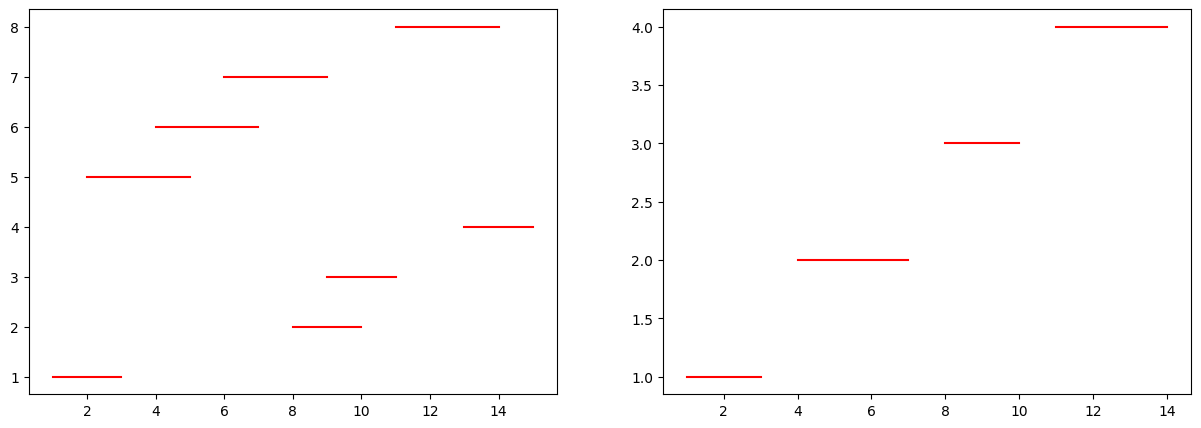

In [ ]:
import matplotlib.pyplot as plt
def plot_intervals(intervals, selected):
    fig, axs = plt.subplots(1,2, figsize=(15, 5))
    y = [1,1]
    for interval in intervals:
        x = [interval.start, interval.end]
        axs[0].plot(x, y, 'r-')
        y = [y[0] + 1, y[1] + 1]
    y = [1,1]
    for interval in selected:
        x = [interval.start, interval.end]
        axs[1].plot(x, y, 'r-')
        y = [y[0] + 1, y[1] + 1]
plot_intervals(intervals, optimalSchedule)


Тестовый пример 2: Контрпример для стратегии "раннее начало"

In [ ]:
counterExample = createCounterExample()

# Выводим все заявки
printSchedule(counterExample)

optimal2 = selectIntervals(counterExample, lambda x: x.end)
startTime2 = selectIntervals(counterExample, lambda x: x.start)

printSchedule(optimal2, "СТРАТЕГИЯ: Раннее окончание (ОПТИМАЛЬНАЯ)")
printSchedule(startTime2, "СТРАТЕГИЯ: Раннее начало (НЕОПТИМАЛЬНАЯ)")


Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	0	10	10
2	1	2	1
3	3	4	1
4	5	6	1
5	7	8	1

СТРАТЕГИЯ: Раннее окончание (ОПТИМАЛЬНАЯ):
Количество выбранных заявок: 4
Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
2	1	2	1
3	3	4	1
4	5	6	1
5	7	8	1

СТРАТЕГИЯ: Раннее начало (НЕОПТИМАЛЬНАЯ):
Количество выбранных заявок: 1
Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	0	10	10


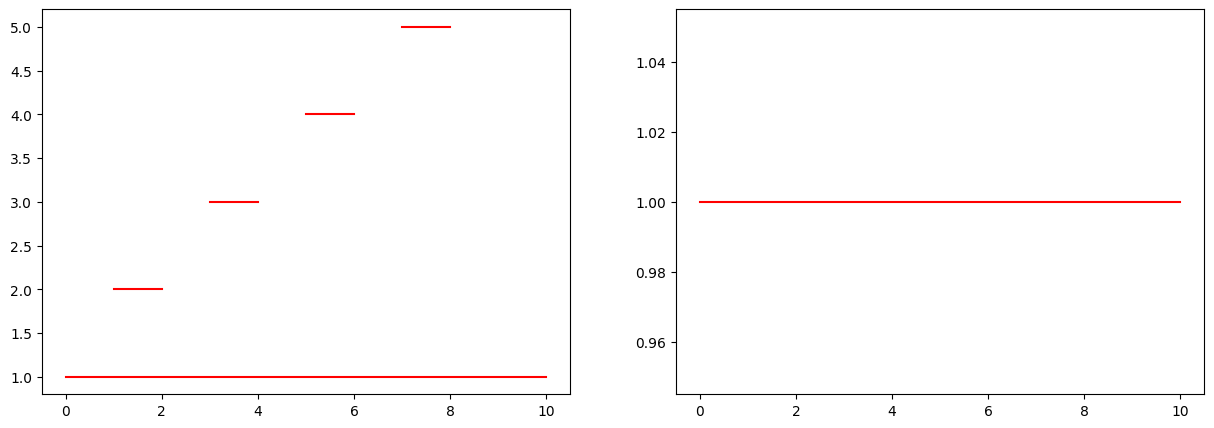

In [ ]:
plot_intervals(counterExample, startTime2)

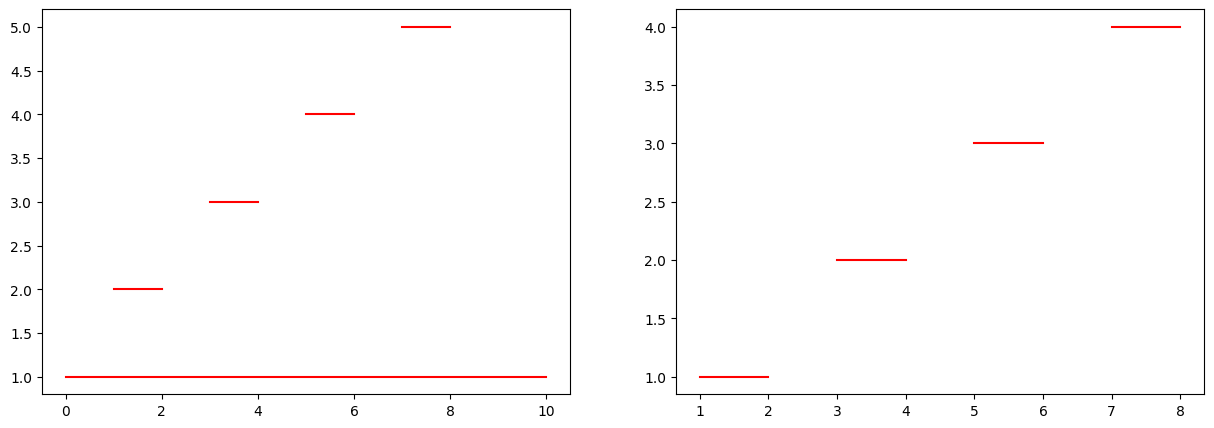

In [ ]:
plot_intervals(counterExample, optimal2)

Демонстрация работы алгоритма шаг за шагом

In [ ]:
demoIntervals = [Interval(1, 1, 3), Interval(2, 2, 5), Interval(3, 4, 7), Interval(4, 6, 9)]
demoIntervals.sort(key=lambda x: x.end)

Заявки после сортировки по времени окончания:

In [ ]:
printSchedule(demoIntervals)

Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	1	3	2
2	2	5	3
3	4	7	3
4	6	9	3


Процесс выбора:

In [ ]:
selected = []
lastEnd = -1

for interval in demoIntervals:
    print(f'Рассматриваем заявку{interval.id}: [{interval.start}, {interval.end}]')

    if interval.start >= lastEnd:
        selected.append(interval)
        lastEnd = interval.end
        print(f" -> ВЫБРАНА (lastEnd = {lastEnd}")
    else:
        print(f" -> ПРОПУЩЕНА (пересекается с последней выбранной)")

printSchedule(selected, "optimal")

Рассматриваем заявку1: [1, 3]
 -> ВЫБРАНА (lastEnd = 3
Рассматриваем заявку2: [2, 5]
 -> ПРОПУЩЕНА (пересекается с последней выбранной)
Рассматриваем заявку3: [4, 7]
 -> ВЫБРАНА (lastEnd = 7
Рассматриваем заявку4: [6, 9]
 -> ПРОПУЩЕНА (пересекается с последней выбранной)

optimal:
Количество выбранных заявок: 2
Заявки:
ID	Начало	Окончание	Длительность
----------------------------------------
1	1	3	2
3	4	7	3
